<a href="https://colab.research.google.com/github/pedrozanineli/estudo-covid-19/blob/main/Estudo_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pandemia Covid-19 e Modelos Matemáticos**

O presente trabalho aplica conceitos de Cálculo (1) por meio da biblioteca Pandas para compreender a pandemia da Covid-19 no Brasil, do início até outubro de 2021.

O trabalho foi baseado no vídeo "Exponential growth and epidemics", do canal 3Blue1Brown, e está disponível no link: https://www.youtube.com/watch?v=Kas0tIxDvrg

(1) James Stewart - Volume 2, 7ª Edição

### **Pré-processamento dos dados e bibliotecas**

Como ponto de partida, faz-se necessária a utilização de bibliotecas escritas em Python que possibilitem a análise das informações que são de interesse. Para tanto, na célula seguinte a importação destas acontece.

A base de dados a ser utilizada é a atualizada pelo site Our World in Data (https://ourworldindata.org/explorers/coronavirus-data-explorer). No dia primeiro de novembro de 2021, os dados foram convertidos para um arquivo .csv e comprimidos, sendo então disponíveis no repositório do trabalho.

In [ ]:
# Importação das bibliotecas a serem utilizadas

import pandas as pd
import datetime as dt
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Base de dados proveniente do https://ourworldindata.org/ (01/11/21)

urldados = 'https://github.com/pedrozanineli/estudo-covid-19/blob/main/owid-covid-data.zip?raw=true'
dfcovid = pd.read_csv(urldados, compression = 'zip')

### **"Crescimento exponencial"**

Desde o início da pandemia e em diversos outros momentos de nossas vidas, testemunhamos a expressão "crescimento exponencial", e que muitas vezes é utilizada da forma incorreta por não conseguirmos reconhecer o que de fato significa.

Em termos técnicos, o crescimento exponencial é compreendido como a multiplicação subsequente dos valores por uma constante, e que pode ser muito bem entendido com a exemplificação dos vírus, em que os novos casos são dependentes dos já existentes.

Entretanto, isso implica em um crescimento ininterrupto dos casos, quando, no caso da pandemia, deve desascelerar. Não é possível, portanto, uma nova infecção quando a mesma já exista para um indivíduo, o que levanta o questionamento: como saber quando saber quando estamos próximos a essa desasceleração?

Dessa forma, o objetivo principal desse trabalho é aplicar uma visão matemática para que seja possível solucionar a questão.

### **Entendendo a base de dados**

Ao declarar a base de dados em uma variável, podemos utilizar o comando .head() para acessar as 5 primeiras linhas e realizar uma análise inicial, em que é possível observar que os dados estão organizados por ordem alfabética dos países. 

In [ ]:
dfcovid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


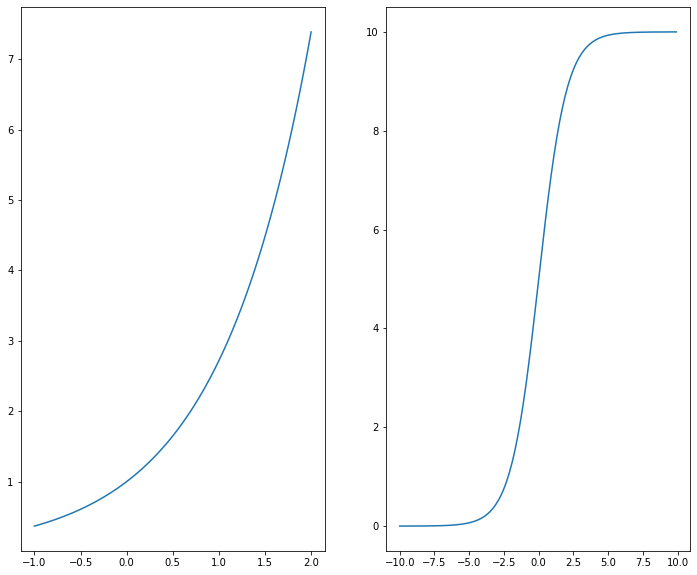

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(1, 2, 1)

# Função Exponencial
x = np.linspace(-1, 2, 100)
y = np.exp(x)
plt.plot(x,  y)

# Curva Logística
def logistic(x, x0, k, L):
    return L/(1+np.exp(-k*(x-x0)))
x = np.arange(start=-10, stop=10, step=0.1)  # an array from -10 to 10 with a step of 0.1

plt.subplot(1, 2, 2)

x0 = 0  # the midpoint of the S curve is 0
L = 10  # maximum point of the curve

ks = np.arange(start=-1, stop=1.1, step=0.5) # different steepness values to plot 

f_x = logistic(x=x, x0=x0, k=1, L=L)
plt.plot(x, f_x)

plt.show()

In [ ]:
# A coluna 'iso_code' indica o Brasil como 'BRA'

dfcovid['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

In [ ]:
# Gerando um DF apenas para o Brasil

dfbrasil = dfcovid[dfcovid['iso_code']=='BRA']
dfbrasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
16214,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
16215,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
16216,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
16217,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
16218,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [ ]:
# Buscando as dimensões do DF

dfbrasil.shape

(614, 65)

In [ ]:
# Transformando as datas de dfbrasil (que são objetos) no formato de data

dfbrasil['date'] =  pd.to_datetime(dfbrasil['date'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Um menos o outro: dias existentes na amostra
# Como fazer cálculo com datas?

dfbrasil['date'].min(), dfbrasil['date'].max()

(Timestamp('2020-02-26 00:00:00'), Timestamp('2021-10-31 00:00:00'))

In [ ]:
# Armazenando os valores de casos registrados a cada mês

dataatual = dfbrasil['date'].min()
pd.to_datetime(dataatual, format="%Y-%m-%d")

casosmes=[]
auxappend = 0

while dataatual <= dfbrasil['date'].max():
  if dataatual.is_month_end == True:
    aux = auxappend
    auxappend = int(dfbrasil.loc[dfbrasil['date']==dataatual, 'total_cases'])
    
    # Como o valor registrado é do número total de casos,
    # é necessário decrescentar o valor registrado no mês anterior

    auxappend = auxappend - aux
    casosmes.append(auxappend)
  dataatual += dt.timedelta(days=1)

convmes = {
  1: 'jan',
  2: 'fev',
  3: 'mar',
  4: 'abr',
  5: 'mai',
  6: 'jun',
  7: 'jul',
  8: 'ago',
  9: 'set',
  10: 'out',
  11: 'nov',
  12: 'dez'    
}

i = 2
ano = 20

for j in casosmes:
  print(convmes[i] + " " + str(ano) + " " + str(j))
  
  if i == 12:
    i = 1
    ano = 21
    print('')
  else:
    i = i + 1

fev 20 2
mar 20 5715
abr 20 81472
mai 20 433377
jun 20 968664
jul 20 1693821
ago 20 2214451
set 20 2596484
out 20 2939121
nov 20 3396757
dez 20 4279216

jan 21 4925515
fev 21 5625744
mar 21 7123003
abr 21 7536008
mai 21 9009546
jun 21 9547595
jul 21 10370260
ago 21 10406610
set 21 11020463
out 21 10790392


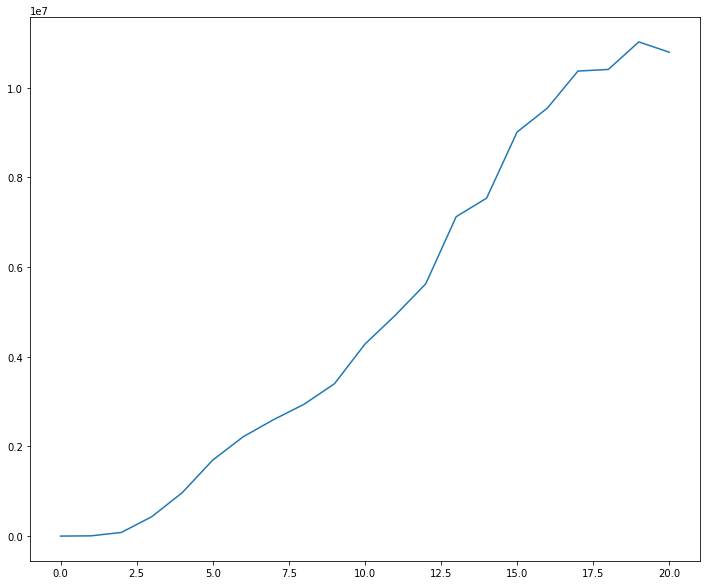

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(casosmes)
plt.show()

In [ ]:
i = 2
ano = 20

for j in range(len(casosmes)-1):
  
  den = casosmes[j]
  num = casosmes[j+1]
  gf = num/den

  if i == 12:
    i = 1
    ano = 21
  else:
    i = i + 1

  #print(gf)
  if gf < 1.1:
   print(convmes[i] + " " + str(ano) + ": " + str(gf))

abr 21: 1.0579818652329642
jun 21: 1.0597198793368723
jul 21: 1.0861646309882227
ago 21: 1.0035052158769404
set 21: 1.0589868362511903
